USArrests.csv

> 1. 1973년 미국 도시별 살인, 폭행, 강간 발생 빈도를 지역별로 나타낸 데이터

In [2]:
import mglearn
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.datasets import load_breast_cancer
import matplotlib
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 한글 폰트 등록
font_location = "C:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)


In [9]:
# 필요없는 column drop()
data = pd.read_csv("data/USArrests.csv")
crime = pd.DataFrame(data)
crime.drop(columns="UrbanPop", inplace=True)

In [11]:
crime.head(5)

,Unnamed: 0,Murder,Assault,Rape
0,Alabama,13.2,236,21.2
1,Alaska,10.0,263,44.5
2,Arizona,8.1,294,31.0
3,Arkansas,8.8,190,19.5
4,California,9.0,276,40.6


In [32]:
crime.rename(columns={"Unnamed: 0":"Location"}, inplace=True)
crime.head(5)

,Location,Murder,Assault,Rape
0,Alabama,13.2,236,21.2
1,Alaska,10.0,263,44.5
2,Arizona,8.1,294,31.0
3,Arkansas,8.8,190,19.5
4,California,9.0,276,40.6


#### 범죄율 target 값 customizing
> 살인, 폭행, 강간 수치의 평균을 구해 80을 기준으로 높은 범죄율(0), 낮은 범죄율(1) 구분

In [43]:
# target 값 customizing
y = crime[["Murder", "Assault", "Rape"]]
y_target = []
for idx, v in y.iterrows():
    c_mean = (v[0] + v[1] + v[2]) / 3
    if c_mean > 80:
        y_target.append(0)
    else :
        y_target.append(1)
        
target = np.array(y_target)

In [44]:
target

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [19]:
x_data = crime[["Murder", "Assault", "Rape"]].to_numpy()
type(x_data)

numpy.ndarray

In [20]:
# 1단계 : 분산이 1, 평균이 0으로 변환해주는 API
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(x_data)
X_scaled = scaler.transform(x_data)

In [24]:
X_scaled.ndim

2

In [25]:
X_scaled.shape

(50, 3)

In [27]:
X_scaled.mean() # 평균이 왜 0이 아니지?

2.842170943040401e-16

In [28]:
# 2단계 : PCA적용, 두개의 주성분만 유지하는 데이터 구조로 변환(차원축소)
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # n_components = 2 : 두개의 주성분으로 유지시긴다는 뜻
pca.fit(X_scaled) # PCA 모델 생성
X_pca = pca.transform(X_scaled)

In [30]:
X_pca.shape

(50, 2)

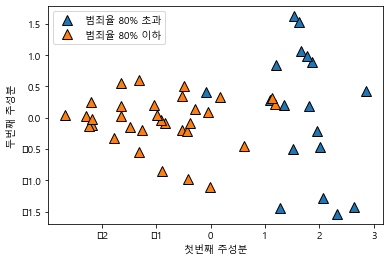

In [46]:
# 3단계 : 산점도로 시각화 - (0 : 악성, 1: 양성)
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], target, markers='^')
plt.legend(["범죄율 80% 초과", "범죄율 80% 이하"], loc="best")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()